> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier–Stokes
======
***

Você deve ter completado seu próprio código para o [Passo 5](./07_Passo_5.ipynb) antes de continuar nesta tarefa. Assim como nos Passos 1 ao 4, vamos avançar progressivamente, então é importante completar os Passos anteriores.

Continuamos...

Passo 6: Convecção 2D
----
***

Agora resolvemos a convecção 2D, representada por um par de equações diferenciais parciais acopladas, dadas por:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0
$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0
$$

Discretizando essas equações usando os métodos que aplicamos anteriormente, temos que:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranjamos ambas equações para isolar $u_{i,j}^{n+1}$ e $v_{i,j}^{n+1}$, respectivamente. Note que estas equações também são acopladas.

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

### Condição inicial

A condição inicial é a mesma que usamos para a convecção 1D, mas aplicada em ambas direções $x$ e $y$.

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{se } x,y \in (0,5; 1)\times(0,5;1) \cr
1 & \text{senão}
\end{matrix}\end{cases}$$

### Condições de Contorno

As condições iniciais mantem $u$ e $v$ iguais a 1 ao longo das bordas da malha.

$$u = 1,\ v = 1 \text{ onde } \begin{cases} \begin{matrix}x=0; 2\cr y=0; 2 \end{matrix}\end{cases}$$

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

In [2]:
###Declaração das variáveis
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((nx, ny)) ##Cria um vetor ny x nx com 1
v = numpy.ones((nx, ny))
un = numpy.ones((nx, ny))
vn = numpy.ones((nx, ny))

###Assinala a condição Inicial
##CI função chapéu : u(0,5<=x<=1 && 0,5<=y<=1 ) is 2
u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2
##CI função chapéu : v(0,5<=x<=1 && 0,5<=y<=1 ) is 2
v[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

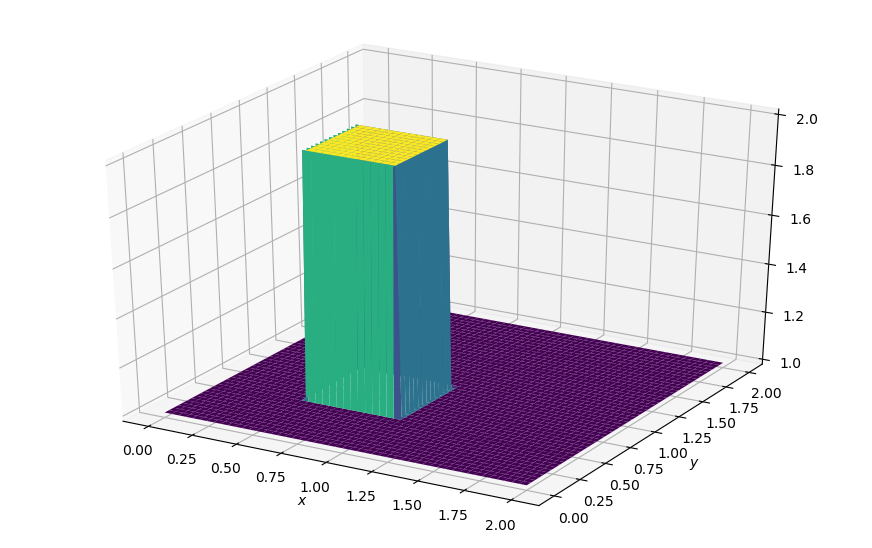

In [3]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u.T, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [4]:
for n in range(nt + 1): ##Laço temporal
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[:-1, 1:])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[1:, :-1]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[:-1, 1:])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[1:, :-1]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

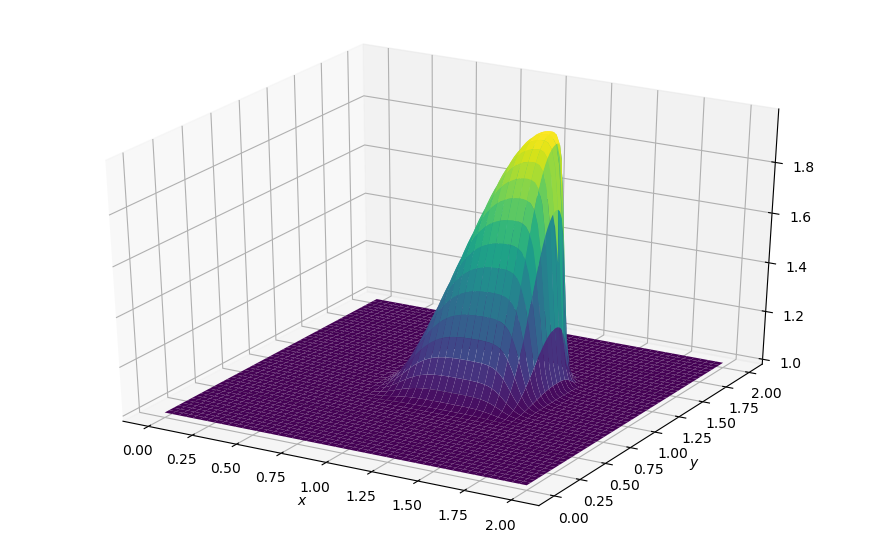

In [5]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u.T, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

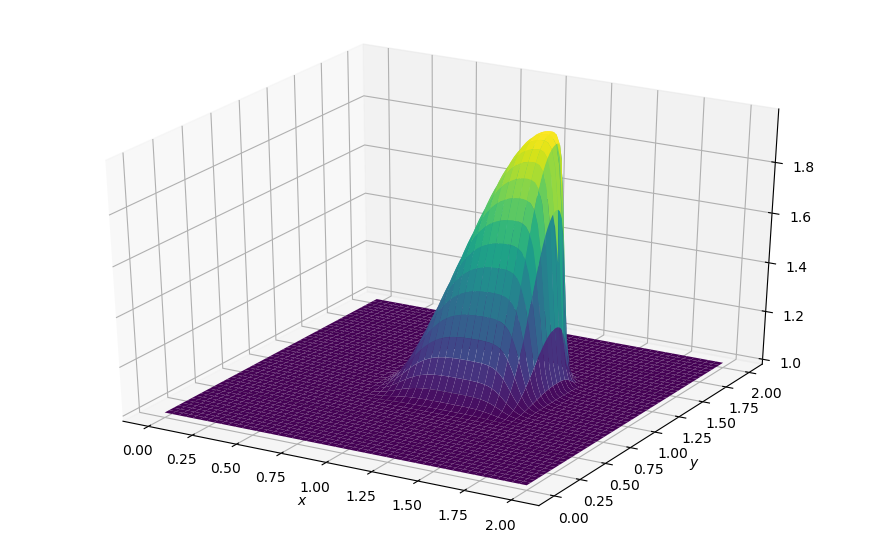

In [6]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, v.T, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Material Complementar
-----
***

A lição em video que cobre os detalhes dos Passos 5 ao 8 é **Video Lesson 6**, no YouTube:

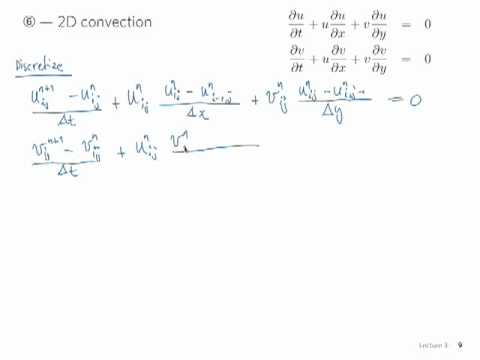

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).